Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [4]:
%matplotlib inline
import thinkplot
import thinkstats2
import nsfg

import chap01soln
resp = chap01soln.ReadFemResp()

In [5]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [6]:
resp = resp[resp.numkdhh < 18]
LessThan18Pmf = thinkstats2.Pmf(resp.numkdhh)

Display the PMF.

/home/casey/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


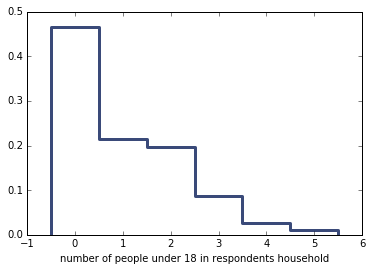

In [7]:
thinkplot.pmf(LessThan18Pmf)
thinkplot.Show(xlabel = 'number of people under 18 in respondents household')

Looking at the graph above, this step function shows that out of all the people that we have data for, almost half of the respondents have 0 people under the age of 18 living in their household. Interestingly enough, almost 1/5 of the people that responded have 1 or 2 people under the age of 18 living in their household. 

Define <tt>BiasPmf</tt>.

In [8]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [9]:
LessThan18PmfBiased = BiasPmf(LessThan18Pmf)
print(LessThan18PmfBiased)

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})


Display the actual Pmf and the biased Pmf on the same axes.

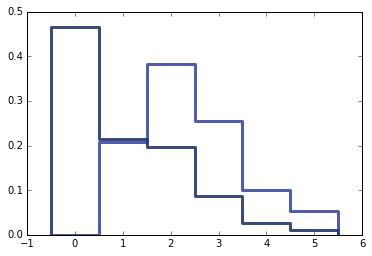

In [10]:
thinkplot.Pmfs([LessThan18Pmf, LessThan18PmfBiased])

Compute the means of the two Pmfs.

In [11]:
unbiased= LessThan18Pmf.Mean()
biased = LessThan18PmfBiased.Mean()
print(unbiased)
print(biased)

1.02420515504
2.40367910066


The means are drastically different. The biased mean is a whole point higher than the actual. This shows that children have the perception of a higher family household size than actual. 

### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

I tried to make this problem work, I really did.

First, I found the data fram for women who have one baby and ones that have at least two babies.

In [65]:
LessThanTwoResps = resp[resp.numbabes < 2]
MoreThanTwoResps = resp[resp.numbabes >= 2]
print(LessThanTwoResps)
print(MoreThanTwoResps)

      caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
1       5012        1         5         1            5            5     42   
2      11586        1         5         1            5            5     43   
3       6794        5         5         4            1            5     15   
4        616        1         5         4            1            5     20   
6      10333        5         5         3            1            5     17   
7        855        5         5         4            5            5     22   
9       3566        5         5         4            5            5     21   
11      9200        5         5         3            1            5     26   
12      6320        5         5         5            5            1     23   
15      3697        5         5         4            5            5     28   
17      5862        1         5         4            1            5     33   
18      8542        5         5         5            5          

I have no idea what "computer pairwise differences" means so I thought that I could subtract the weight, but there are probably more rows in MoreThanTwoResps than LessThanTwoResps therefore I am not sure how I would implement pair wise differences. 

In [66]:
MoreThanTwoResps.basewgt - LessThanTwoResps.basewgt 

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
7613   NaN
7614   NaN
7615   NaN
7616   NaN
7617   NaN
7618   NaN
7619   NaN
7620   NaN
7621   NaN
7622   NaN
7623   NaN
7624   NaN
7625   NaN
7626   NaN
7627   NaN
7628   NaN
7629   NaN
7630   NaN
7631   NaN
7632   NaN
7633   NaN
7634   NaN
7635   NaN
7636   NaN
7637   NaN
7638   NaN
7639   NaN
7640   NaN
7641   NaN
7642   NaN
Name: basewgt, dtype: float64

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

I am so confused about the last question. 

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.